# Lab 2

In this lab exercise, you will look at applying different noise removal filters and investigate the effect on edge detection.

**You are asked to write a short (no more than 2 pages) report of your work**, answering specific questions, and showing example images. This work is not assessed (it will not count toward your module mark) but you will get formative feedback

In [2]:
# Imports
import skimage
import scipy
import time
from matplotlib import pyplot as plt
import numpy as np
from filters import gaussian_filter_3x3, gaussian_filter_5x5 
from utils import show_rgb_image, show_binary_image, sample_gaussian, zero_cross

In [3]:
#Magnitude function
from scipy.linalg import sqrtm

def magnitude(x,y):
    x_sqr = np.square(x)
    y_sqr = np.square(y)
    m = np.sqrt(x_sqr + y_sqr)
    return m

In [4]:
#Sobel

sobel_x = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1]])

sobel_y = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]])

In [5]:
#Mean filter 33
mean_filter = np.array(
    [[1/9,1/9,1/9],
     [1/9,1/9,1/9],
     [1/9,1/9,1/9]])

### Task 1

- Load the shakey image using the ```skimage.io.imread``` function

- Using the built-in procedure ```scipy.signal.convolve2D``` convolve the image with the 3x3 Gaussian filter, and then the 5x5 filter. Can you see any difference between them? Try applying an edge filter to each and thresholding. Refer to the previous assignment to understand the convolve2d function.

**QUESTION 1: Can you describe the effect in comparison with applying the edge filter to the image directly?**

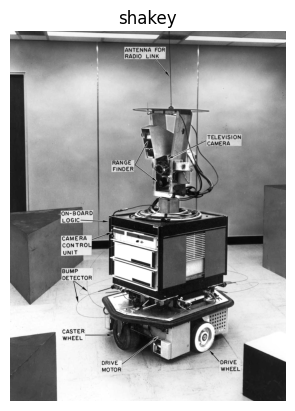

In [6]:
#loading original shakey
shakey = skimage.io.imread('shakey.jpg')[:,:,0]
plt.imshow(shakey,cmap='gray')
plt.title('shakey')
plt.axis('off')
plt.show()
 

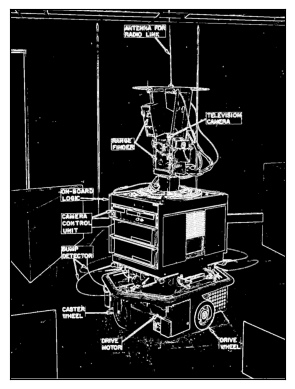

In [7]:
#directly applying sobel without smoothing using Gaussian
shakey_sobel_x = scipy.signal.convolve2d(shakey, sobel_x)
shakey_sobel_y = scipy.signal.convolve2d(shakey, sobel_y)
m_sobel = magnitude(shakey_sobel_x,shakey_sobel_y)
show_binary_image(m_sobel>100)

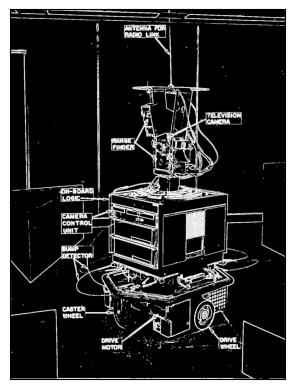

In [8]:
#Smoothing with Gaussian33 then apply sobel
shakey_gaussian_3 = scipy.signal.convolve2d(shakey, gaussian_filter_3x3)
shakey_sobel_x = scipy.signal.convolve2d(shakey_gaussian_3, sobel_x)
shakey_sobel_y = scipy.signal.convolve2d(shakey_gaussian_3, sobel_y)
m_gaussian3_sobel = magnitude(shakey_sobel_x,shakey_sobel_y)
show_binary_image(m_gaussian3_sobel>100)

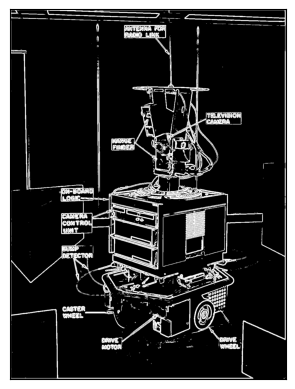

In [9]:
#Smoothing with Gaussian55 then apply sobel
shakey_gaussian_5 = scipy.signal.convolve2d(shakey, gaussian_filter_5x5)
shakey_sobel_x = scipy.signal.convolve2d(shakey_gaussian_5, sobel_x)
shakey_sobel_y = scipy.signal.convolve2d(shakey_gaussian_5, sobel_y)
m_gaussian5_sobel = magnitude(shakey_sobel_x,shakey_sobel_y)
show_binary_image(m_gaussian5_sobel>100)

Applying the gaussian filter results in a smoother image. When the original edge image image is compared to the gaussian filtered edge image, there is far less noise in the gaussian filtered edge image.

### Task 2

Using the function ```sample_gaussian(std_dev,mean,vec)``` you can create a discrete sample from a Gaussian (Normal) density. You need to specify the mean(keep it at 0, think about why) and the standard deviation **std_dev**. You should also specify an input vector in the form of ```np.arange(min=-x,max=x+1,step=1,dtype=np.float32)``` which will produce a sample of size 2x+1.

So you can create larger and smaller vectors by altering the step size or the limits of the vector (the min and max values). 


In [10]:
vec1 = np.arange(-1, 2, 1, np.float32)
sample_gaussian(0.5,0,vec1)   #This is a discrete sample from a Gaussian density

array([[0.10798194, 0.7978846 , 0.10798194]], dtype=float32)


Now try creating a 9x9 Gaussian mask. To do this you will need to use matrix multiplication in the right way. 

Try some initial exploratory experiments with this, what happens to the image as you increase the size of the mask? What happens as you increase the size of **std_dev**? Make detailed notes as you proceed about what you did and what you observed.

Now apply gradient operators such as the Sobel operators to the blurred images. What happens to the edges in the heavily blurred case?

**Question 2: What  is  the  effect  of  increasing  the  size  of  the  Gaussian  Filter  (3x3  versus  5x5  for  example)?** 
**What is the effect of changing the standard deviation s? Why do you see what you see?**

In [11]:
#defining function that creates Gaussian kernel
#This code is from: https://gist.github.com/thomasaarholt/267ec4fff40ca9dff1106490ea3b7567

def gaussian_kernel_2D(n, std, normalised=False):
    '''
    Generates a n x n matrix with a centered gaussian 
    of standard deviation std centered on it. If normalised,
    its volume equals 1.'''
    gaussian1D = scipy.signal.gaussian(n, std)
    gaussian2D = np.outer(gaussian1D, gaussian1D)
    if normalised:
        gaussian2D /= (2*np.pi*(std**2))
    return gaussian2D


/var/folders/3l/x1bybstn0g11cjwvn6x17fkc0000gn/T/ipykernel_28875/3378415853.py:9: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian1D = scipy.signal.gaussian(n, std)


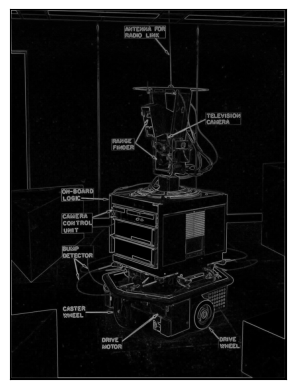

In [12]:
gaussian_9 = gaussian_kernel_2D(9,0.25)
shakey_gaussian_9 = scipy.signal.convolve2d(shakey, gaussian_9)
shakey_sobel_x = scipy.signal.convolve2d(shakey_gaussian_9, sobel_x)
shakey_sobel_y = scipy.signal.convolve2d(shakey_gaussian_9, sobel_y)
m_gaussian9_sobel = magnitude(shakey_sobel_x,shakey_sobel_y)
show_binary_image(m_gaussian9_sobel)

Increasing the standard deviation shifts the weighting of the convolution away from the centre pixel and gives increased weighting to the pixels furtuer out. This results in the image appearing increasingly blurred. 

### Task 3

Now compare the speed of applying two large 1D Gaussian filters in sequence, with applying a single equivalent 2D Gaussian filter that results from their multiplication. To test the CPU time used you can use a function called [time.monotonic()](https://docs.python.org/3/library/time.html#time.monotonic) . 

- Can you detect differences in the CPU times as the mask sizes  increase? 
- You should check that the results are the same by examining areas of the image matrix in detail. 
- Are there any effects due to small floating point errors? 

In [13]:
def gaussian_kernel_1D(n, std):
    gaussian1D = scipy.signal.gaussian(n, std)
    return gaussian1D

In [14]:
temp_1D_gaussain = gaussian_kernel_1D(20,0.5)

start_time = time.monotonic()
shakey_temp = scipy.signal.convolve2d(shakey, temp_1D_gaussain.reshape(1,-1))
shakey_gaussian_1D_20 = scipy.signal.convolve2d(shakey_temp, temp_1D_gaussain.reshape(-1,1))
end_time = time.monotonic()

elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")

#show_binary_image(shakey_gaussian_1D)

Elapsed Time: 0.17248412499998267 seconds


/var/folders/3l/x1bybstn0g11cjwvn6x17fkc0000gn/T/ipykernel_28875/608999567.py:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian1D = scipy.signal.gaussian(n, std)


In [15]:
temp_2D_gaussian = gaussian_kernel_1D(20,0.5)
gaussian_2D_20 = temp_2D_gaussian.reshape(-1,1) * temp_2D_gaussian.reshape(1,-1)

start_time = time.monotonic()
shakey_gaussian_2D_20 = scipy.signal.convolve2d(shakey,gaussian_2D_20)
end_time = time.monotonic()

elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")

/var/folders/3l/x1bybstn0g11cjwvn6x17fkc0000gn/T/ipykernel_28875/608999567.py:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian1D = scipy.signal.gaussian(n, std)


Elapsed Time: 0.7679140000000189 seconds


The execution time of applying a 2D convolution is far greater than that of applying two 1D filters. These differences increase as the size of the filter increases. When we compare the number of pixels which are the same we notice that only 7% of pixels are unchanged. However, visually the differences are very hard to distinguish. 

### Task 4

- Look at your Lecture notes and produce a 2D Laplacian filter. 

- Now try applying the Laplacian operator to the Shakey image. You will need to calculate the zero-crossing for edges: you can use the provided zero_corss function, where I_in is the image convolved with the Laplacian, and I_out is the calculated edges. 

- Think about the result. Why does it produce a poor result compared to the other operators?

In [16]:
def laplacian(image,kernel_x, kernel_y):
    image_x_1st = scipy.signal.convolve2d(image,kernel_x)
    image_x_2nd = scipy.signal.convolve2d(image_x_1st,kernel_x)

    image_y_1st = scipy.signal.convolve2d(image,kernel_y)
    image_y_2nd = scipy.signal.convolve2d(image_y_1st,kernel_y)
    
    result = magnitude(image_x_2nd,image_y_2nd)
    return result

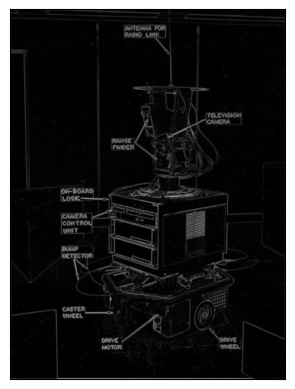

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
I_in = laplacian(shakey, sobel_x, sobel_y)
show_binary_image(I_in)

I_out = zero_cross(I_in)
print(I_out)

The resulting image is very noisy. This because Laplacian filter is the sum of two second order derivatives in x-and y- axis which amplifies noise easily.

# Task 5

I mentioned the Laplacian of the Gaussian in the lecture. How could you combine the idea of 
the Laplacian operator with the idea of Gaussian smoothing? Try out your ideas.

/var/folders/3l/x1bybstn0g11cjwvn6x17fkc0000gn/T/ipykernel_28875/3378415853.py:9: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian1D = scipy.signal.gaussian(n, std)


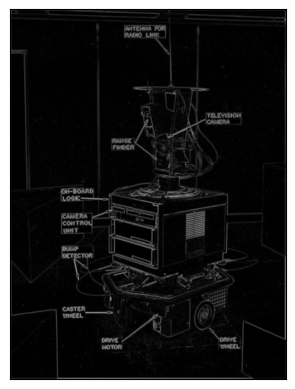

In [18]:
#Image ⊗ G ⊗ L (= Image ⊗ L∘ G),  then 0-crossing

gau = gaussian_kernel_2D(5,0.25)
L_G = laplacian(shakey_gaussian_3,sobel_x,sobel_y)
show_binary_image(L_G)

In [19]:
L_G.shape

(1506, 1123)